### Concrete Strength Prediction with Neural Networks

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Creating own data with scikit learn

In [2]:
from sklearn.datasets import make_regression
X, Y = make_regression(n_features=30, n_samples=5000, noise=10, random_state=42)



In [3]:
X

array([[ 0.73579588,  1.04112706, -0.87140389, ..., -1.28557712,
         0.8309933 , -1.58487991],
       [-0.108076  ,  2.32106851,  2.29221164, ...,  0.68131372,
        -2.40173397, -1.18387309],
       [ 0.30806463, -0.82467886,  1.38549697, ...,  1.4745775 ,
        -0.86784344, -0.11117936],
       ...,
       [ 0.46886758,  0.94334516,  0.44395667, ...,  1.35342463,
         0.09998062, -0.7785281 ],
       [ 0.75775478,  0.43412698, -0.12148711, ..., -0.97502138,
         1.3888001 ,  0.36543184],
       [-0.11071739, -0.60025471, -0.13589803, ...,  0.00344785,
         1.33576046,  1.48514776]])

In [4]:
X.shape

(5000, 30)

In [5]:
Y.shape

(5000,)

In [6]:
cols = [f'x{i}' for i in range(30)]
cols

['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x24',
 'x25',
 'x26',
 'x27',
 'x28',
 'x29']

In [7]:
import pandas as pd
X = pd.DataFrame(X)
X.columns = cols
X

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29
0,0.735796,1.041127,-0.871404,0.508606,-0.636648,1.332272,-0.503400,1.374134,1.270885,1.988603,...,0.317767,2.951914,-0.248546,-0.870800,-1.569923,0.395626,1.066135,-1.285577,0.830993,-1.584880
1,-0.108076,2.321069,2.292212,1.122974,0.558116,-0.328548,1.750118,-0.534911,0.213996,0.364157,...,0.081067,0.497429,0.824820,0.205803,-0.622931,-0.853174,0.924574,0.681314,-2.401734,-1.183873
2,0.308065,-0.824679,1.385497,1.927543,0.236301,0.562039,0.465317,-1.171702,0.346263,-0.152707,...,-0.834410,-1.240574,-0.722814,-0.107633,0.424254,-1.886220,2.157491,1.474577,-0.867843,-0.111179
3,-0.837979,-0.001572,-0.879153,-0.215569,0.108785,1.122969,-1.351074,0.652168,-0.142286,-0.348107,...,-0.861413,-1.071020,0.300968,-0.835940,0.410507,-0.308762,0.009512,1.576850,-0.367144,-0.796132
4,-0.252247,-0.407280,1.432967,-0.489814,-0.154190,0.385624,1.356910,1.209124,2.927645,-0.156261,...,-0.318957,3.536532,1.391892,0.385200,-0.620109,1.764385,-0.765251,0.003286,0.170299,-0.905189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.531823,-0.753699,-0.526386,-0.134938,-0.572953,-0.259428,-0.491569,-0.442929,0.767339,-0.807009,...,-0.451589,-2.689713,0.236172,-2.629400,1.804714,0.158483,0.457955,0.665615,1.110167,0.672384
4996,0.378681,0.842819,-0.146172,-1.625534,-0.955834,0.185233,-1.016409,1.275818,-1.631155,-1.343036,...,0.096142,0.726612,-0.280988,-0.070456,1.671552,-0.261690,1.142516,-0.998338,0.523002,1.496653
4997,0.468868,0.943345,0.443957,-0.671411,-0.117502,0.544626,0.348450,0.553522,0.505444,-0.346620,...,0.378791,0.449205,0.890035,-1.157446,0.979357,0.497428,-0.312307,1.353425,0.099981,-0.778528
4998,0.757755,0.434127,-0.121487,-0.217615,-0.088260,-0.355547,-0.803803,0.893347,0.145759,-1.258296,...,-0.441476,1.075934,0.511556,0.737071,1.306280,1.712308,-1.226916,-0.975021,1.388800,0.365432


In [8]:
Y=pd.DataFrame(Y)
Y.columns = ['Y']
Y

,Y
0,150.973830
1,34.772072
2,-254.332036
3,67.563592
4,371.994270
...,...
4995,-75.457805
4996,214.869422
4997,281.812602
4998,197.266648


## Create preprocessing pipeline for X

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [10]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

In [11]:
X_pre = num_pipe.fit_transform(X)
X_pre

array([[ 0.74522802,  1.05648626, -0.90506965, ..., -1.30803257,
         0.84170597, -1.57717141],
       [-0.10350458,  2.31911253,  2.31665157, ...,  0.67291129,
        -2.37529169, -1.17462579],
       [ 0.31503302, -0.78407885,  1.3932834 , ...,  1.47184277,
        -0.84886467, -0.09781578],
       ...,
       [ 0.47676221,  0.96002717,  0.43444996, ...,  1.3498243 ,
         0.11425021, -0.76772536],
       [ 0.7673134 ,  0.45769774, -0.14137924, ..., -0.99525798,
         1.39679863,  0.38062434],
       [-0.10616118, -0.56269073, -0.15605485, ..., -0.00979779,
         1.34401706,  1.50463697]])

In [12]:
cols = num_pipe.get_feature_names_out()
cols

array(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28',
       'x29'], dtype=object)

In [13]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29
0,0.745228,1.056486,-0.905070,0.519462,-0.639618,1.338450,-0.481092,1.363730,1.263597,1.958957,...,0.327146,2.928869,-0.272461,-0.845469,-1.578828,0.378638,1.069910,-1.308033,0.841706,-1.577171
1,-0.103505,2.319113,2.316652,1.141287,0.551350,-0.326713,1.759410,-0.546866,0.203975,0.352701,...,0.088325,0.492024,0.809076,0.194107,-0.632590,-0.855621,0.928962,0.672911,-2.375292,-1.174626
2,0.315033,-0.784079,1.393283,1.955622,0.230558,0.566203,0.482029,-1.184175,0.336584,-0.158376,...,-0.835351,-1.233488,-0.750340,-0.108549,0.413763,-1.876639,2.156540,1.471843,-0.848865,-0.097816
3,-0.837612,0.027893,-0.912961,-0.213504,0.103447,1.128600,-1.323870,0.641177,-0.153228,-0.351588,...,-0.862595,-1.065153,0.281236,-0.811807,0.400026,-0.317548,0.017862,1.574846,-0.350601,-0.785396
4,-0.248506,-0.372327,1.441625,-0.491078,-0.158693,0.389326,1.368473,1.198586,2.924641,-0.161889,...,-0.315281,3.509286,1.380466,0.367333,-0.629769,1.731461,-0.753547,-0.009961,0.184226,-0.894872


### Train Test split
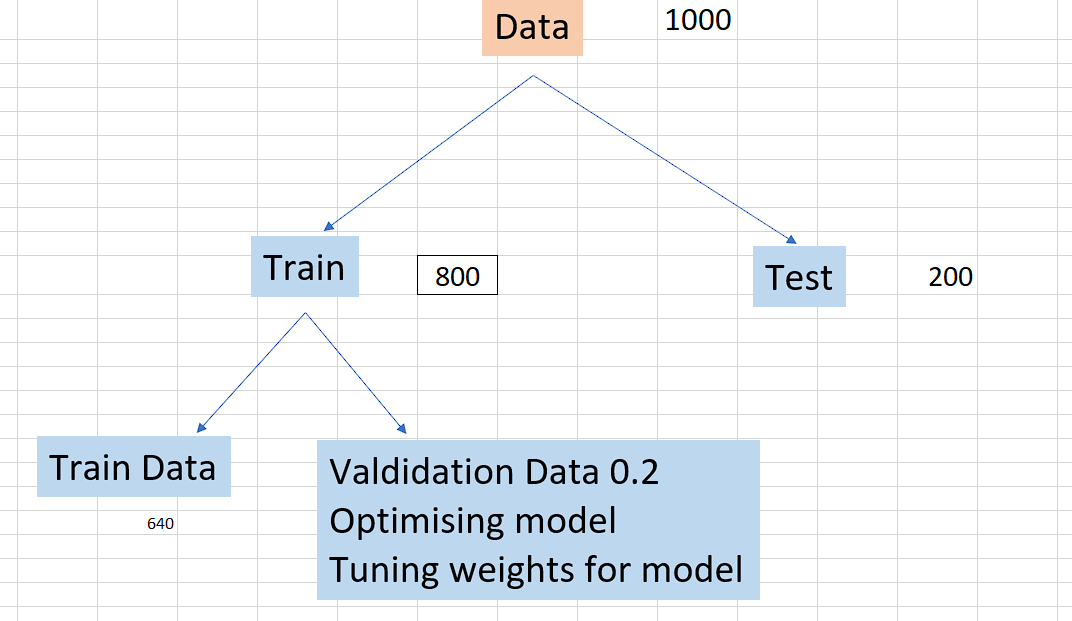

In [15]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest  = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [16]:
xtrain.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29
4227,-1.711500,-0.974283,2.148708,1.146298,0.005667,0.195566,-0.383993,-0.718080,0.386160,0.836130,...,-0.038466,-0.586292,-0.755515,1.123953,0.481978,-0.486258,0.334790,0.492318,-0.331858,-0.342493
4676,0.172312,-0.970151,-1.179572,-0.638740,-0.422951,0.177145,0.573145,1.813015,-1.607622,-0.210241,...,0.634777,1.713791,-0.022969,-0.378341,0.832926,-0.503255,0.237117,-0.149347,0.496145,0.754362
800,-1.492289,1.229383,-0.018078,-0.330406,-0.371915,1.970379,-0.418413,0.938733,-2.671832,0.913192,...,1.204552,0.116447,-1.738264,-1.584350,0.806748,0.271933,0.243712,1.454942,-0.461815,-1.043920
3671,0.915208,-0.514593,0.540443,-1.099790,2.368460,-0.297468,-0.562002,0.908696,-1.896036,-0.194337,...,-1.940698,-0.578662,0.707078,0.542981,-0.463365,-0.548334,-1.093015,0.286737,-1.080500,0.341760
4193,-0.887632,0.544564,-0.925896,0.256488,-1.976681,-0.632713,-0.212875,-1.303906,-0.842213,1.017362,...,-1.244223,0.173869,-1.161800,-0.959832,0.309585,-0.131386,-1.678463,-1.296317,-0.200358,0.692108


In [17]:
xtest.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29
1501,-0.681669,-0.281059,2.761616,-1.400011,-1.530909,-0.691941,-0.345960,-1.165733,-0.977374,1.478053,...,0.065161,-0.574885,1.219792,-0.408543,0.410107,0.152741,-0.649394,-0.099675,-0.689437,0.316981
2586,-0.324089,-0.272152,0.131552,1.071197,-0.411231,-0.624608,-0.307337,-0.742311,-0.385733,0.749045,...,-0.022851,0.211214,-0.328267,0.025272,0.292487,1.457876,-0.003496,-1.953557,-1.208221,1.142259
2653,1.266622,0.356315,-2.476023,-0.637571,-0.971267,0.664652,0.223826,-0.643297,1.608720,2.256304,...,-0.898993,-1.080242,0.006157,1.155127,2.669230,-1.679951,1.550418,0.778363,-0.765626,-1.815478
1055,1.352776,-0.123473,-0.496008,0.493306,0.947843,0.275741,-0.338589,-1.573045,-2.225637,0.621801,...,1.037722,1.577578,-1.077313,-1.397536,-0.502970,0.760472,-1.593517,0.063864,-0.829425,1.452322
705,-0.669097,0.582714,0.583174,-0.958410,0.875485,0.029174,0.370883,1.022421,1.194240,-0.798537,...,-0.772146,-1.593999,0.447282,0.945441,-0.336529,1.797089,1.423586,0.315882,-1.119409,1.249510


In [18]:
ytrain.head()

,Y
4227,-56.089296
4676,-84.673738
800,-317.290236
3671,-281.509789
4193,-274.629618


In [19]:
ytest.head()

,Y
1501,-193.262454
2586,-76.344635
2653,60.838159
1055,-269.853318
705,29.186902


In [20]:
xtrain.shape

(4000, 30)

In [21]:
xtest.shape

(1000, 30)

In [22]:
xtrain.shape[1]

30

## Create a Neural network
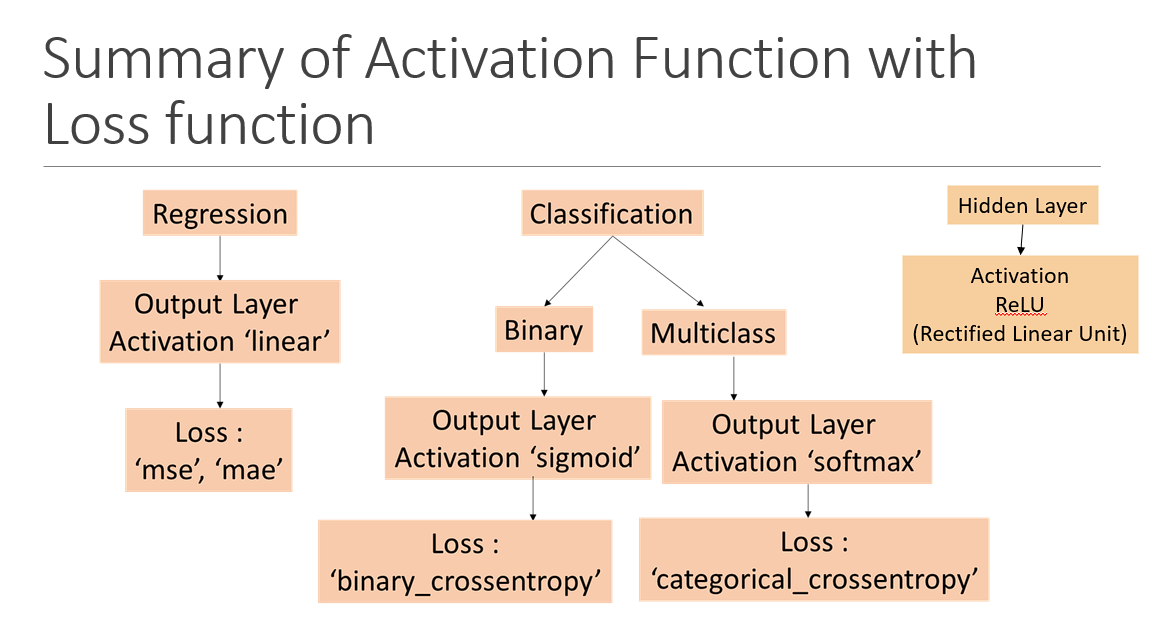

In [23]:
from keras.models import Sequential
from keras.layers import Dense

In [24]:
# Initialize Sequential Model
model = Sequential()

# Create Hidden Layer 1
model.add(Dense(units=32, activation='relu', input_dim=xtrain.shape[1]))

# Create Hidden Layer 2
model.add(Dense(units=16, activation='relu'))

# Create Hidden Layer 3
model.add(Dense(units=8, activation='relu'))

# Create output Layer
model.add(Dense(units=1, activation='linear'))

## Compile the model

In [25]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

## Fit the model

In [26]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=100)

Epoch 1/100


100/100 [==============================] - 5s 15ms/step - loss: 31081.4648 - mae: 141.4017 - val_loss: 30492.2656 - val_mae: 141.6183
Epoch 2/100
100/100 [==============================] - 1s 7ms/step - loss: 28287.3008 - mae: 134.3125 - val_loss: 23845.3457 - val_mae: 123.2872
Epoch 3/100
100/100 [==============================] - 1s 5ms/step - loss: 18820.7871 - mae: 101.5034 - val_loss: 15055.5166 - val_mae: 84.0148
Epoch 4/100
100/100 [==============================] - 0s 4ms/step - loss: 12823.5684 - mae: 72.5847 - val_loss: 9717.9141 - val_mae: 61.7870
Epoch 5/100
100/100 [==============================] - 0s 5ms/step - loss: 6325.8589 - mae: 50.6263 - val_loss: 2972.1038 - val_mae: 36.7895
Epoch 6/100
100/100 [==============================] - 0s 4ms/step - loss: 1619.4083 - mae: 28.8705 - val_loss: 838.4208 - val_mae: 22.8056
Epoch 7/100
100/100 [==============================] - 0s 4ms/step - loss: 639.5863 - mae: 19.9458 - val_loss: 484.4643 - val_mae: 17.7200
E

In [27]:
hist.history['loss']

[31081.46484375,
 28287.30078125,
 18820.787109375,
 12823.568359375,
 6325.85888671875,
 1619.4083251953125,
 639.5863037109375,
 413.53668212890625,
 339.0128479003906,
 282.36663818359375,
 246.37132263183594,
 230.6050567626953,
 218.52635192871094,
 206.3746337890625,
 195.81507873535156,
 185.34707641601562,
 174.54617309570312,
 166.41978454589844,
 158.28025817871094,
 149.41342163085938,
 142.06484985351562,
 135.14630126953125,
 130.0618896484375,
 124.93608093261719,
 121.2192611694336,
 116.74536895751953,
 113.17997741699219,
 110.92057800292969,
 107.65444946289062,
 106.6075668334961,
 103.51378631591797,
 101.64017486572266,
 100.06498718261719,
 98.4140853881836,
 97.2929458618164,
 96.98605346679688,
 95.14007568359375,
 95.6349868774414,
 94.1728744506836,
 93.08946990966797,
 92.28874206542969,
 90.82543182373047,
 92.02881622314453,
 89.51880645751953,
 89.45947265625,
 88.56465911865234,
 88.9803695678711,
 87.99665069580078,
 87.22681427001953,
 86.64436340332031

In [28]:
hist.history['val_loss']

[30492.265625,
 23845.345703125,
 15055.5166015625,
 9717.9140625,
 2972.103759765625,
 838.4207763671875,
 484.4642639160156,
 373.5920715332031,
 324.5032958984375,
 273.7885437011719,
 257.2149353027344,
 248.61215209960938,
 236.57455444335938,
 224.3419189453125,
 220.62254333496094,
 210.015625,
 201.15936279296875,
 199.20681762695312,
 182.40167236328125,
 176.07211303710938,
 171.21063232421875,
 164.3900604248047,
 160.75357055664062,
 158.4882354736328,
 154.2115478515625,
 150.19256591796875,
 149.66236877441406,
 144.6773681640625,
 147.66110229492188,
 144.27001953125,
 143.17001342773438,
 142.91012573242188,
 139.55677795410156,
 139.2990264892578,
 139.13621520996094,
 136.8695831298828,
 141.84759521484375,
 134.72096252441406,
 139.22140502929688,
 136.7110595703125,
 138.43775939941406,
 136.06777954101562,
 134.64736938476562,
 136.25025939941406,
 136.52188110351562,
 134.5998992919922,
 135.5839385986328,
 135.3184356689453,
 133.23716735839844,
 136.098526000976

In [29]:
hist.history['mae']

[141.40170288085938,
 134.31248474121094,
 101.50335693359375,
 72.58470916748047,
 50.626304626464844,
 28.870498657226562,
 19.94576644897461,
 16.084379196166992,
 14.70806884765625,
 13.386099815368652,
 12.528242111206055,
 12.140674591064453,
 11.816673278808594,
 11.540828704833984,
 11.20217514038086,
 10.924948692321777,
 10.590531349182129,
 10.344867706298828,
 10.085529327392578,
 9.807891845703125,
 9.524643898010254,
 9.315047264099121,
 9.135723114013672,
 8.92250919342041,
 8.805688858032227,
 8.634751319885254,
 8.5170316696167,
 8.450592994689941,
 8.299051284790039,
 8.28833293914795,
 8.116637229919434,
 8.060312271118164,
 7.9919753074646,
 7.930240631103516,
 7.888887405395508,
 7.870247840881348,
 7.820764541625977,
 7.820656776428223,
 7.7846293449401855,
 7.709629058837891,
 7.66810417175293,
 7.632795333862305,
 7.702868461608887,
 7.560365200042725,
 7.540264129638672,
 7.526956081390381,
 7.561407089233398,
 7.498143196105957,
 7.4514007568359375,
 7.4454741

In [30]:
hist.history['val_mae']

[141.61825561523438,
 123.28715515136719,
 84.01483154296875,
 61.787017822265625,
 36.789493560791016,
 22.805631637573242,
 17.71995735168457,
 15.557655334472656,
 14.473771095275879,
 13.325839042663574,
 12.893608093261719,
 12.666664123535156,
 12.366314888000488,
 12.1572265625,
 12.022139549255371,
 11.789315223693848,
 11.533308029174805,
 11.291240692138672,
 10.943821907043457,
 10.786933898925781,
 10.589068412780762,
 10.356878280639648,
 10.227958679199219,
 10.175788879394531,
 9.998955726623535,
 9.890870094299316,
 9.866753578186035,
 9.713129043579102,
 9.74874496459961,
 9.63852310180664,
 9.586310386657715,
 9.56835651397705,
 9.43526840209961,
 9.427850723266602,
 9.4045991897583,
 9.331028938293457,
 9.5150785446167,
 9.201539993286133,
 9.376264572143555,
 9.332198143005371,
 9.378034591674805,
 9.2763671875,
 9.263511657714844,
 9.35603141784668,
 9.294493675231934,
 9.252464294433594,
 9.289485931396484,
 9.248656272888184,
 9.193857192993164,
 9.29243850708007

## Plot the learning curve

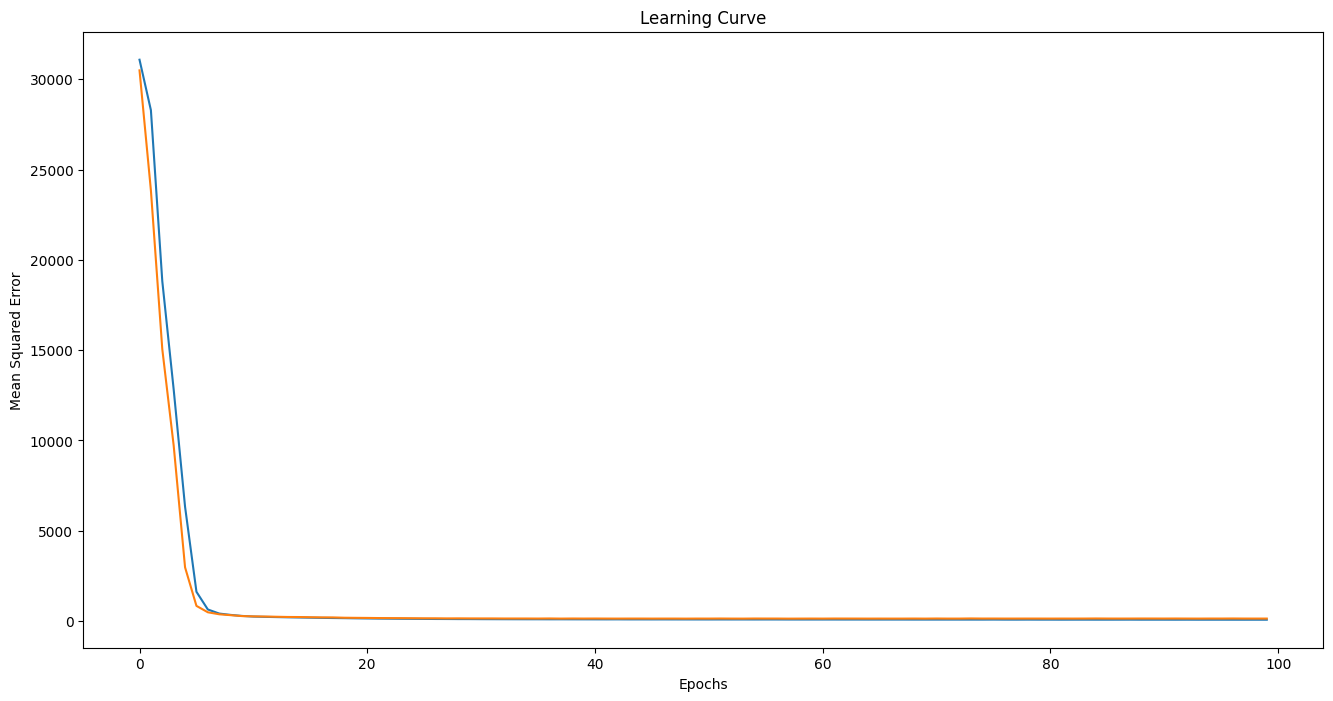

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.plot(hist.history['loss'], label='Training MSE')
plt.plot(hist.history['val_loss'], label='Valdiation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.show()

### Predict values for train and test

In [32]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

32/32 [==============================] - 0s 3ms/step


In [33]:
ypred_tr[0:5]

array([[ -63.1358 ],
       [ -74.3625 ],
       [-324.95584],
       [-286.1298 ],
       [-284.8929 ]], dtype=float32)

In [34]:
ytrain.head()

,Y
4227,-56.089296
4676,-84.673738
800,-317.290236
3671,-281.509789
4193,-274.629618


In [35]:
ypred_ts[0:5]

array([[-212.58928 ],
       [ -66.784035],
       [  80.62755 ],
       [-279.26987 ],
       [  19.789898]], dtype=float32)

In [36]:
ytest.head()

,Y
1501,-193.262454
2586,-76.344635
2653,60.838159
1055,-269.853318
705,29.186902


### Evaluate model based on different metrics

In [37]:
model.evaluate(xtrain, ytrain)

125/125 [==============================] - 0s 2ms/step - loss: 80.9077 - mae: 7.0539


[80.90768432617188, 7.053889274597168]

In [38]:
model.evaluate(xtest, ytest)

32/32 [==============================] - 1s 6ms/step - loss: 125.4138 - mae: 8.9807


[125.41381072998047, 8.980749130249023]

## Check r2 score for train and test

In [39]:
from sklearn.metrics import r2_score
r2_score(ytrain, ypred_tr)

0.9974042245607246

In [40]:
r2_score(ytest, ypred_ts)

0.9960270626917441

### Save the above model

In [41]:
model.save('RegressionModel.keras')

### Load The model

In [42]:
from keras.models import load_model

In [43]:
nn = load_model('RegressionModel.keras')
nn

In [44]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1665 (6.50 KB)
Trainable params: 1665 (6.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
